# Bayesian Optimization: A Simple Example
Reference: https://machinelearningmastery.com/what-is-bayesian-optimization/

For this example, let's find the maximum of $x^2 \sin^6(5\pi x)$ with noise within $x \in [0, 1]$.

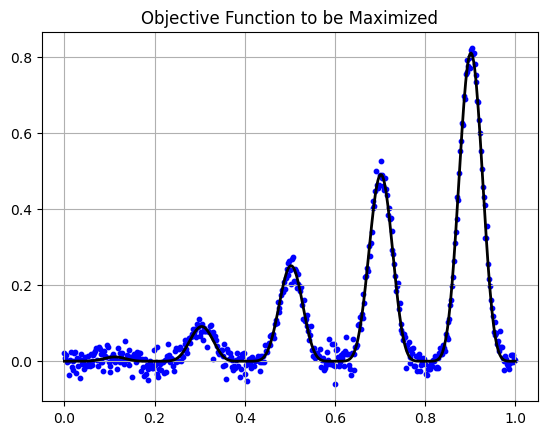

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal, rand, seed
from warnings import catch_warnings, simplefilter
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

seed(5)
# catch any warning generated when making a prediction
with catch_warnings():
    # ignore generated warnings
    simplefilter("ignore")

# objective function
def objective(x, noise=0.02):
    noise = normal(loc=0, scale=noise)
    return (x**2 * m.sin(5*m.pi*x)**6.0) + noise

X_fine = np.linspace(0,1,500)
y = [objective(x, 0) for x in X_fine]
y_noise = [objective(x) for x in X_fine]
plt.scatter(X_fine,y_noise,10,'b')
plt.plot(X_fine,y,'k',lw=2)
plt.title('Objective Function to be Maximized')
plt.grid()
plt.show()

Define auxiliary function for plotting the surrogate and acquisition functions.

In [2]:
model = GaussianProcessRegressor(kernel=RBF(length_scale=0.01), 
                                 normalize_y=False, 
                                 n_restarts_optimizer=10,
                                 alpha=0.02**2,
                                 random_state=0)

def plot_surrogate_acquisition(model, X_fine, X, y, make_plot):
    # model:  contains the fitted GPR
    # X_fine: contains finely separated points from 0 to 1
    # X:      contains the X samples from the objective func.
    # y:      contains the objective function values at X
        
    y_fine_pred, y_fine_std = model.predict(X_fine, return_std=True)
    y_pred, y_std = model.predict(X, return_std=True)
    y_fine_true = [objective(x, 0) for x in X_fine]
    
    xi = 0.02   # Degree of exploration
    
    best = max(y_fine_pred)
    probs = norm.cdf((y_fine_pred - best - xi) / (y_fine_std+1E-9))
    next_X = X_fine[np.argmax(probs,0)]
    
    if make_plot == 1:
        # Plot the surrogate model and the samples
        plt.figure(figsize=(7,7))
        plt.subplot(2,1,1)
        plt.plot(X_fine,y_fine_true, 'k', label='Ground Truth')
        plt.scatter(X, y, 20, 'b', label='Sampled points')
        plt.plot(X_fine, y_fine_pred, 'b', lw=0.8, label='GP mean')
        plt.fill_between(
            X_fine.ravel(),
            y_fine_pred - y_fine_std,
            y_fine_pred + y_fine_std,
            color='b',
            alpha=0.1,
            label='GP 1-std.dev.'
        )
        plt.grid()
        plt.axis([0, 1, -0.1, 1])
        plt.title(f"After {len(y)} samples")
        plt.legend(loc='upper left')
    
        # Plot the acquisition function: Probability of Improvement
        plt.subplot(2,1,2)
        plt.plot(X_fine, probs, 'm', lw=2)
        plt.ylabel('Probability of Improvement')
        plt.scatter(next_X,max(probs),25,'m',edgecolor='k')
        plt.xlim([0, 1])
        plt.grid()
    
    return next_X


Simulate the scenario where we start with only 5 samples from the objective function, then we visualize the surrogate predictions and acquisition function for every succeeding arrival of a new set of samples.

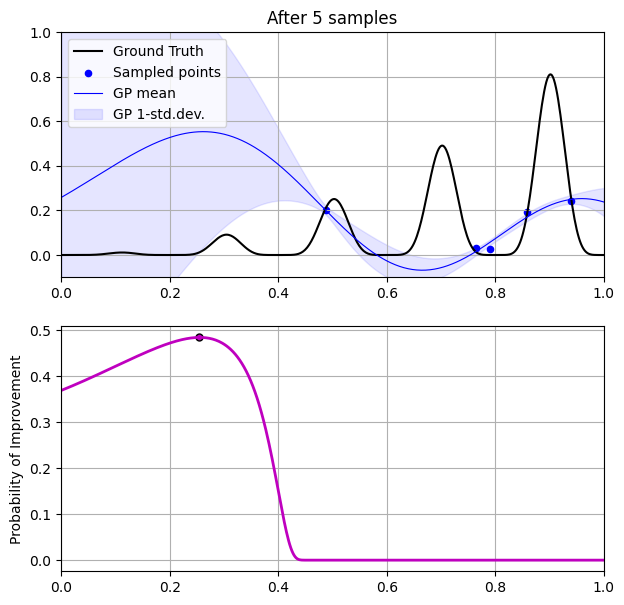

Sample 6: [0.25450902]


In [3]:
init_samples = 5
X = rand(init_samples)
y = np.asarray([objective(x) for x in X])
X, y = X.reshape(-1,1), y.reshape(-1,1)
X_fine = X_fine.reshape(-1,1)

model.fit(X,y)
next_X = plot_surrogate_acquisition(model, X_fine, X, y, 1)
plt.show()
print(f"Sample {init_samples+1}: {next_X}")

We view the results of Bayesian Optimization for the next 20 iterations.

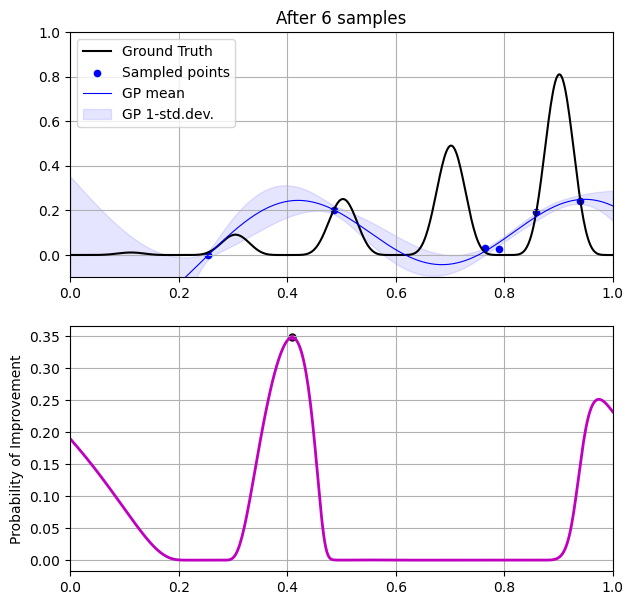

Sample 7: [0.40881764]


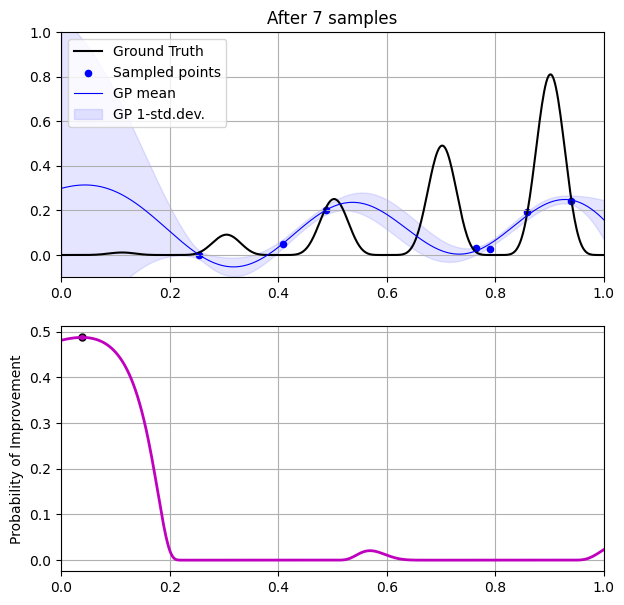

Sample 8: [0.03807615]


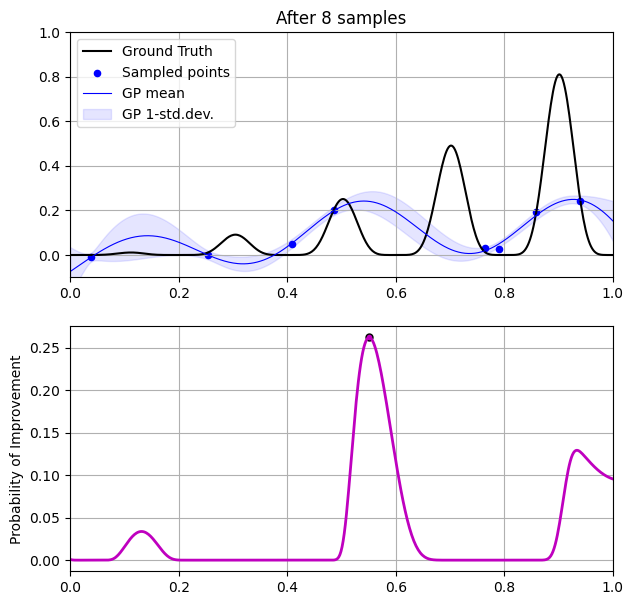

Sample 9: [0.5511022]


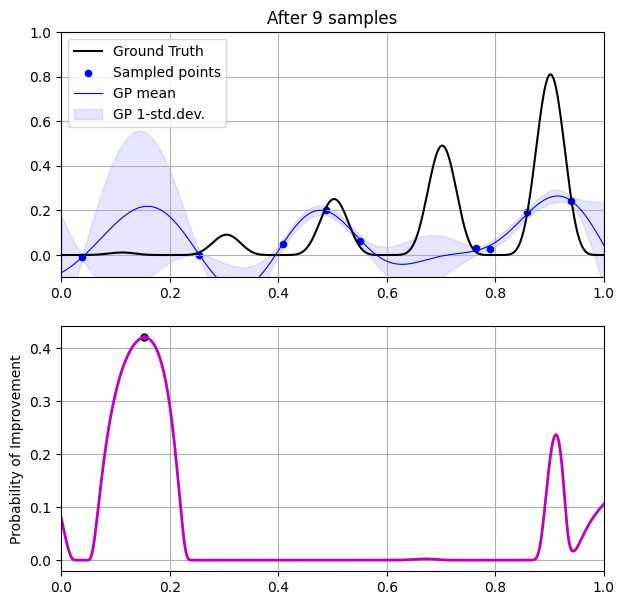

Sample 10: [0.15230461]


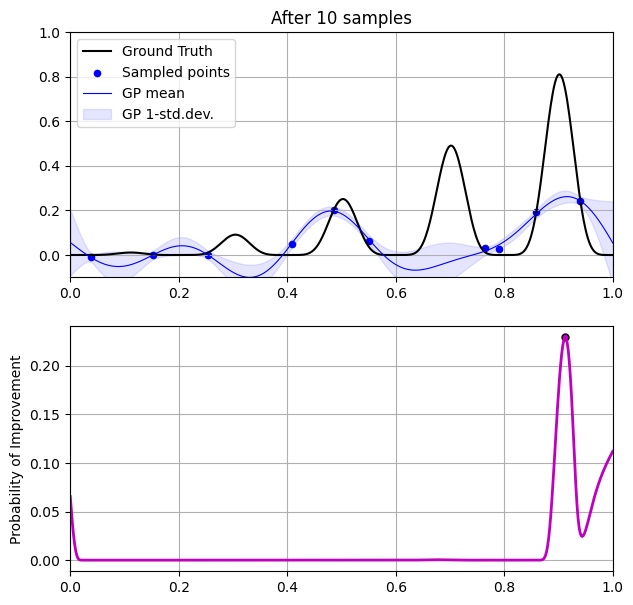

Sample 11: [0.91182365]


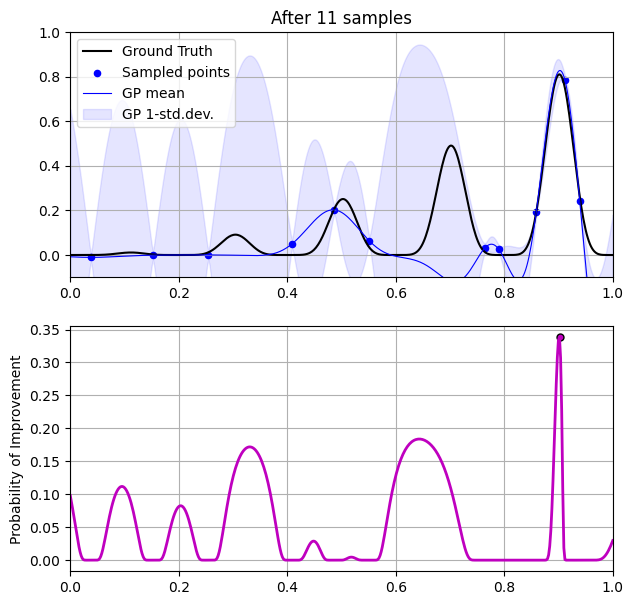

Sample 12: [0.90180361]


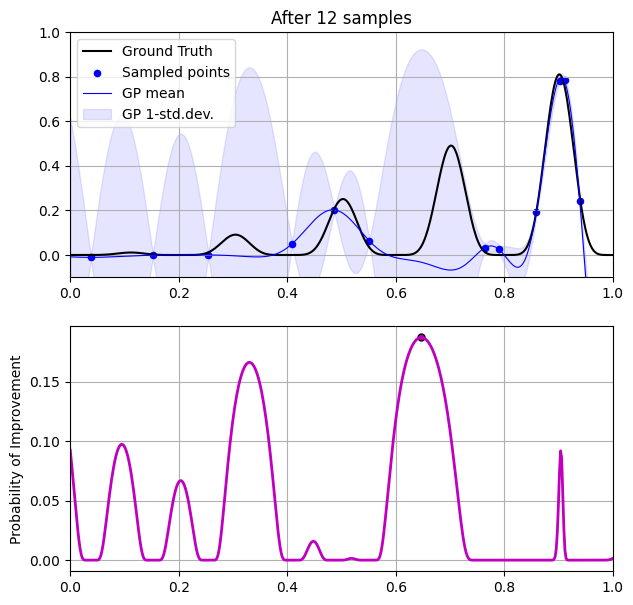

Sample 13: [0.64729459]


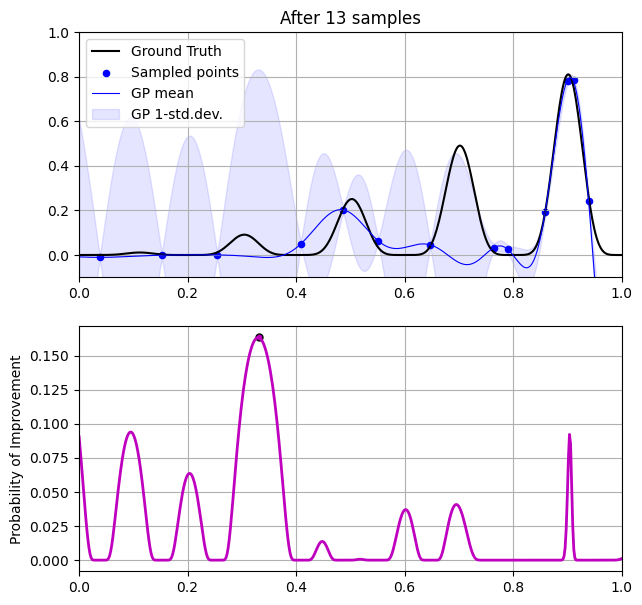

Sample 14: [0.33066132]


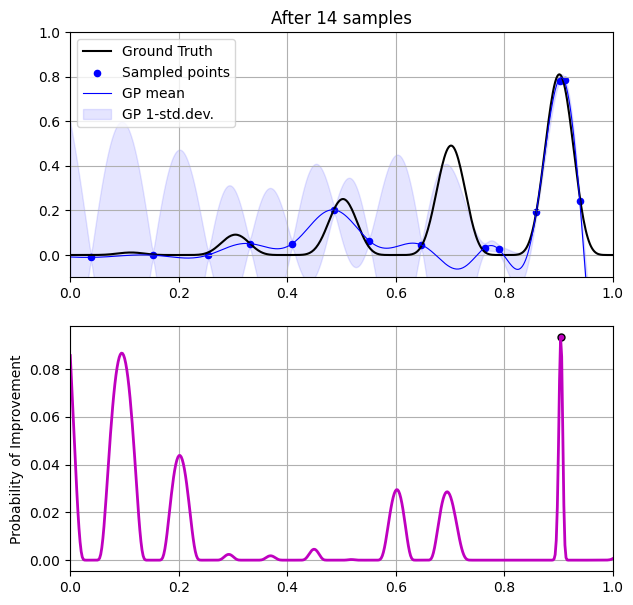

Sample 15: [0.90380762]


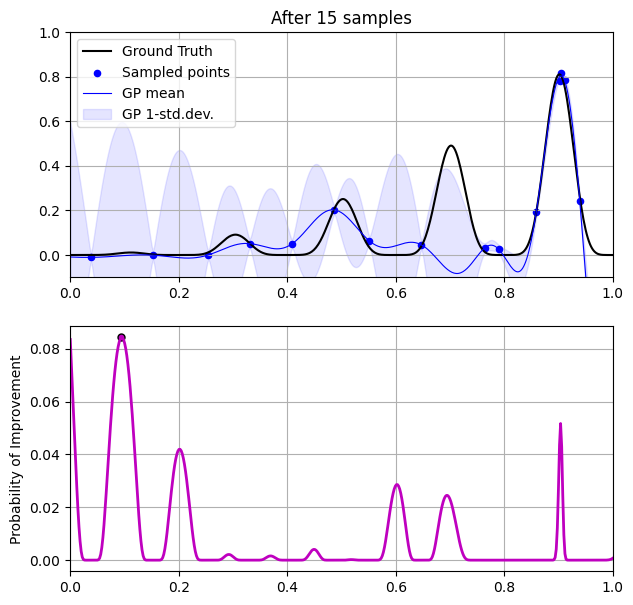

Sample 16: [0.09418838]


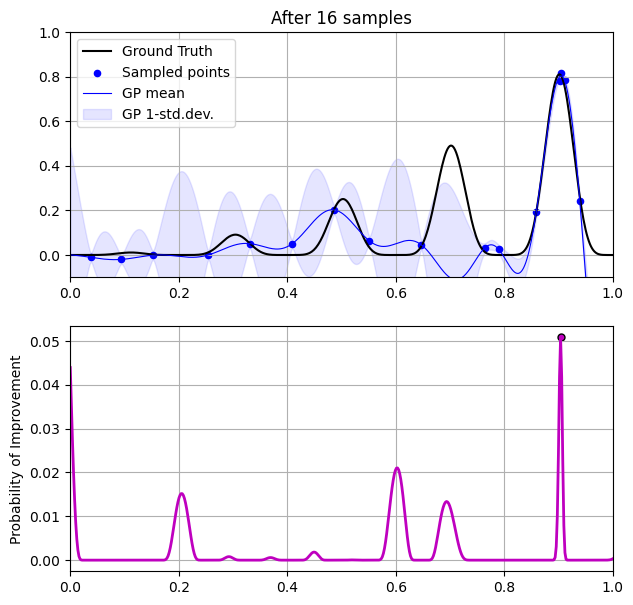

Sample 17: [0.90380762]


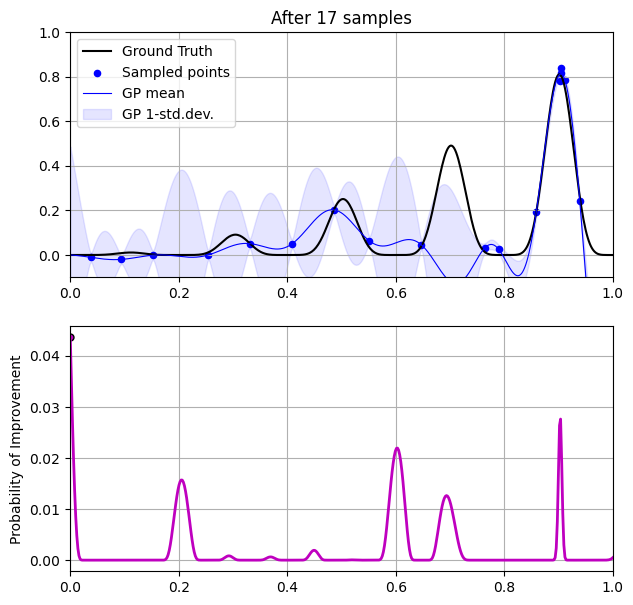

Sample 18: [0.]


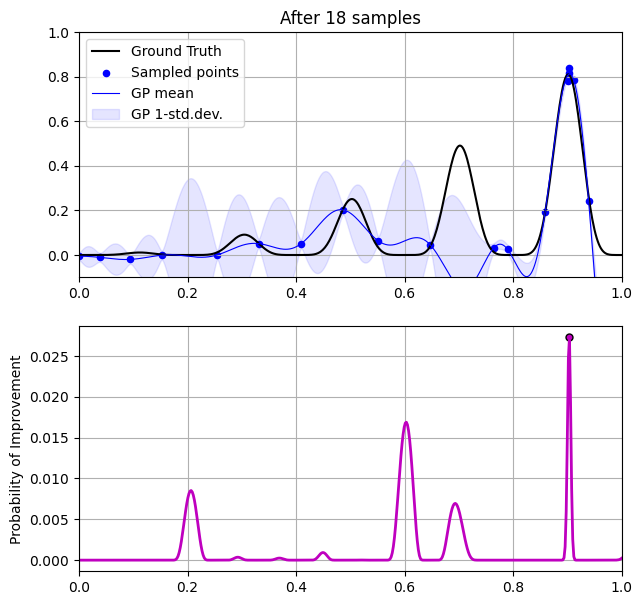

Sample 19: [0.90380762]


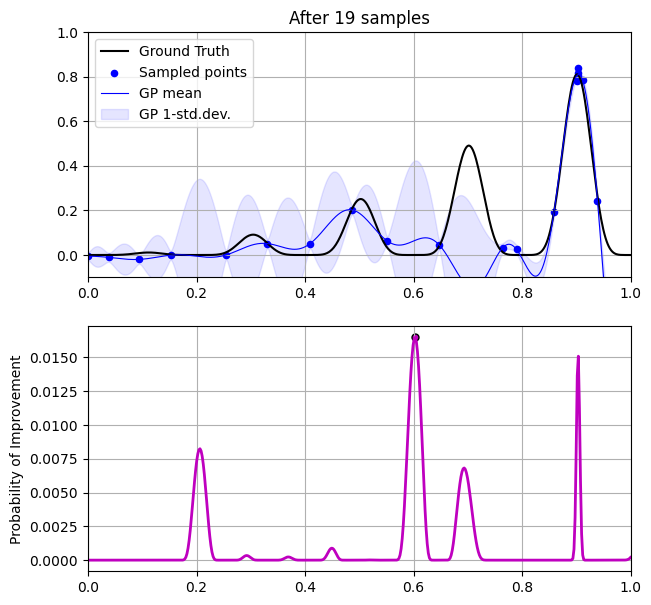

Sample 20: [0.60320641]


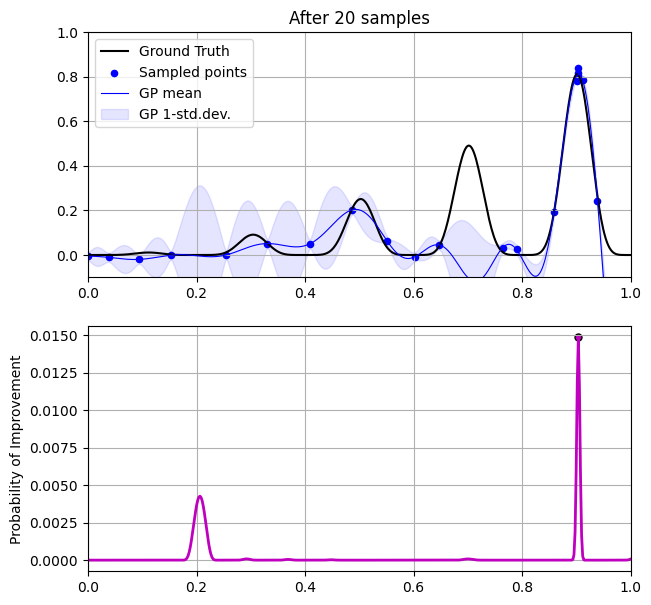

Sample 21: [0.90380762]


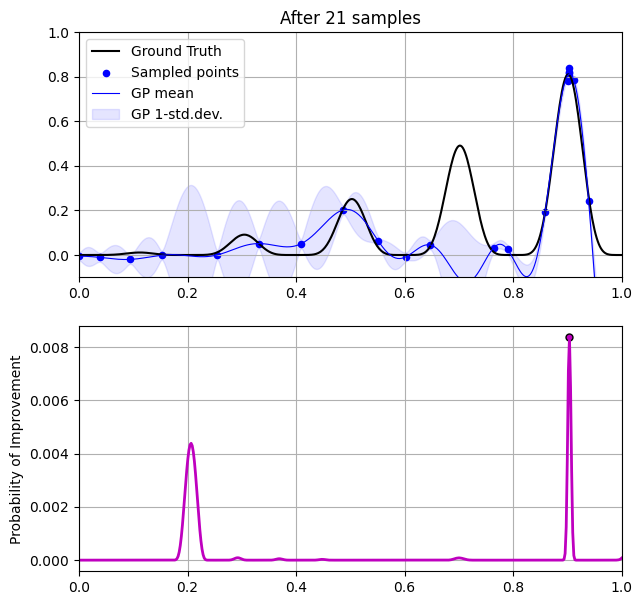

Sample 22: [0.90380762]


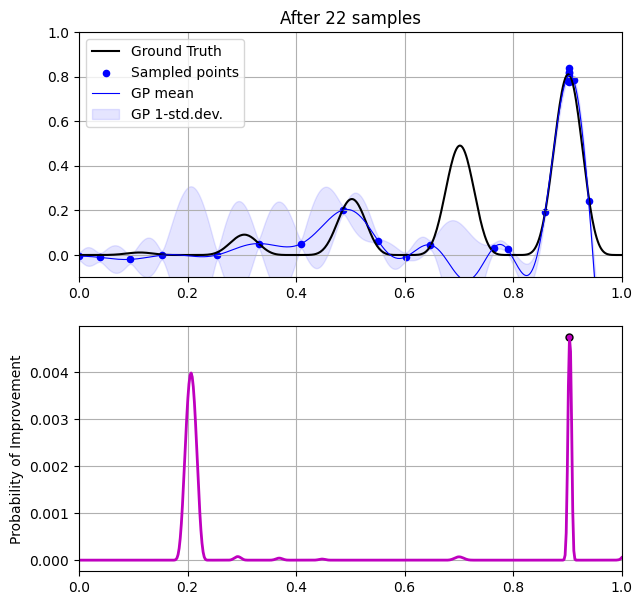

Sample 23: [0.90380762]


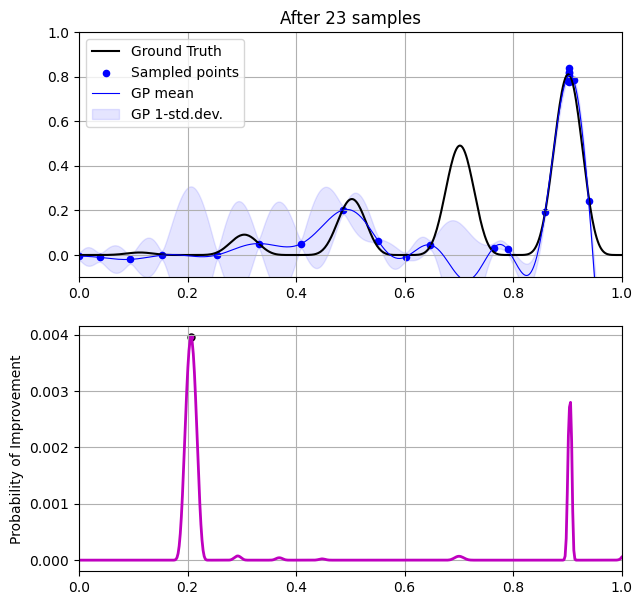

Sample 24: [0.20641283]


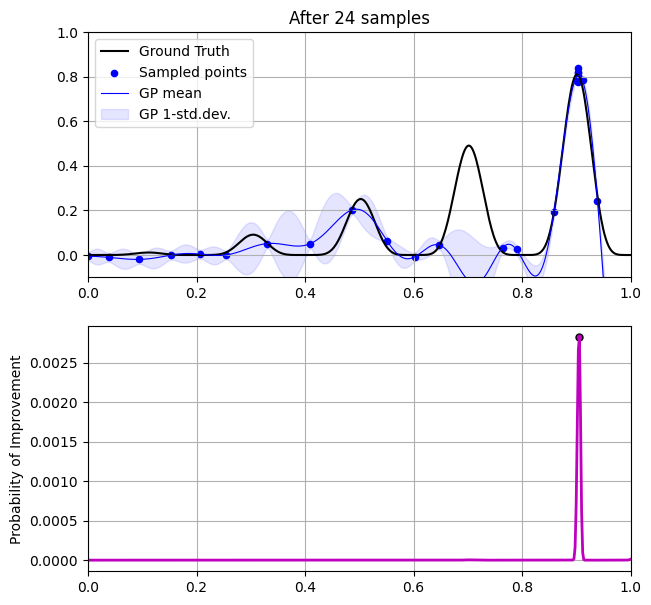

Sample 25: [0.90581162]


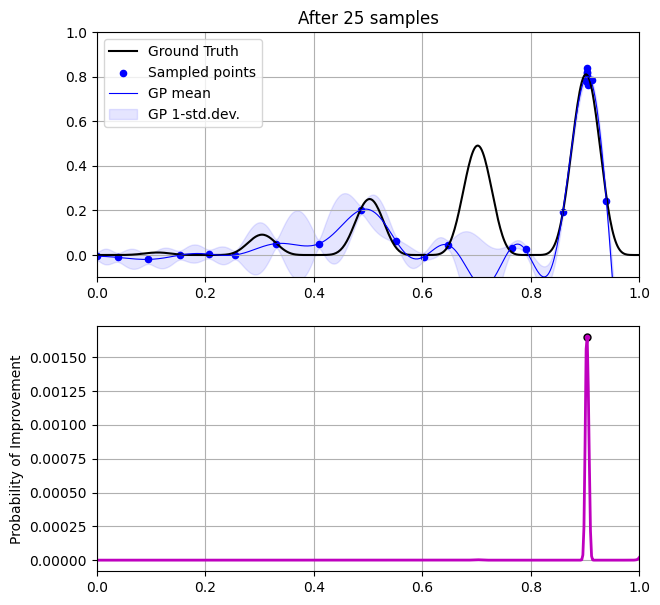

Sample 26: [0.90380762]


In [4]:
max_iter = 25
for i in range(0, max_iter - init_samples):
    X = np.append(X,next_X)
    y = np.append(y,objective(next_X))
    X, y = X.reshape(-1,1), y.reshape(-1,1)
    model.fit(X,y)
    next_X = plot_surrogate_acquisition(model, X_fine, X, y, 1)
    plt.show() 
    print(f"Sample {init_samples+i+2}: {next_X}")